---

# Chapter 3: Data Visualization

---

## Matplotlib



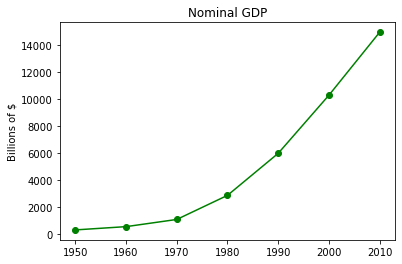

In [63]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.show()
# plt.savefig('im/viz_gdp.png')
# plt.gca().clear()

## Bar Chart
Plot the group of limited number of category on x axis and associated value by y-axis. 

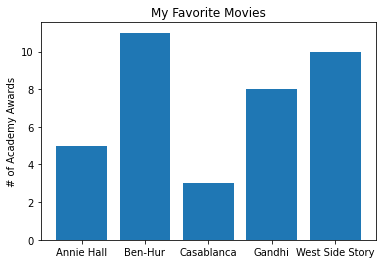

In [3]:

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()


#plt.savefig('im/viz_movies.png')
#plt.gca().clear()


Anatohr benfit of bar graph is depict the data distribution. Firstly we group the ``grade`` into a small range widht 10 (0 to 9,10 to 19 and so all). Below is not from the book but I think make the figure more clear.

In [71]:
grades = [1,11,29,23,31,35,39,49,43,59,69,70,71,78,80,89,90,91,92,93,96,100]
[min(grade // 10 * 10, 90) for grade in grades]

[0,
 10,
 20,
 20,
 30,
 30,
 30,
 40,
 40,
 50,
 60,
 70,
 70,
 70,
 80,
 80,
 90,
 90,
 90,
 90,
 90,
 90]

Then use ``Counter`` to count the frequencey

In [72]:
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
print(histogram)

Counter({90: 6, 30: 3, 70: 3, 20: 2, 40: 2, 80: 2, 0: 1, 10: 1, 50: 1, 60: 1})


The output show the distribution, each bara shows how many score in each range. Note that this method is not a good way since we need to use ``10`` twice, on the ``Counter`` and on the ``pl.bar()``. We may fix this by define ``10`` as a variable constant or use other way to automatically.  ``5`` also same issue when used to set both bar gaps and the axis.

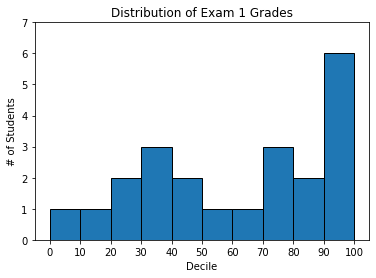

In [74]:
from collections import Counter
# form book
# grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
grades = [1,11,29,23,31,35,39,49,43,59,69,70,71,78,80,89,90,91,92,93,96,100]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)


plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 8
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 7])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 7

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")

plt.show()


#plt.savefig('im/viz_grades.png')
#plt.gca().clear()

Becarefull when y-axis values too close, ``mentions = [500,505]``  and this example try to shows the differentiate by set the mislead range ``499,506`` .

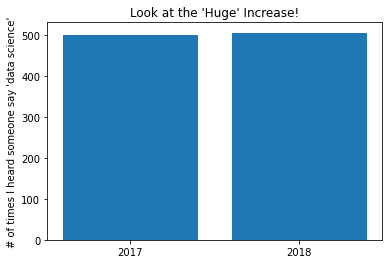

In [57]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
#plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

#plt.savefig('im/viz_misleading_y_axis.png')
#plt.gca().clear()


May be try to set other such  ``plt.axis([2016.5, 2018.5, 475, 550])`` but still seem no look good.

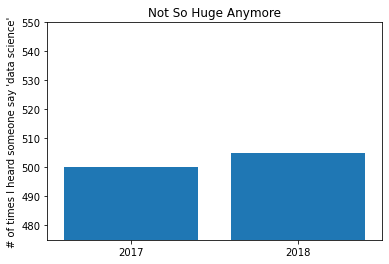

In [60]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

# from book
# plt.axis([2016.5, 2018.5, 500, 550])
plt.axis([2016.5, 2018.5, 475, 550])

plt.title("Not So Huge Anymore")
plt.show()
# plt.savefig('im/viz_non_misleading_y_axis.png')
# plt.gca().clear()

## Line Chart
Line chart is a simple and usful to present the trend of data. Supposed two data ``variance``, with bias ``bias_squored`` and create ``total_error`` for calculate the error line. ``xs`` used for the number of data.

In [61]:
# y 
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
# x
xs = [i for i, _ in enumerate(variance)]

print(total_error)
print(xs)

[257, 130, 68, 40, 32, 40, 68, 130, 257]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


These three lines plot labeled by arguemnt ``label`` which be shown in ``legend(location=9)``

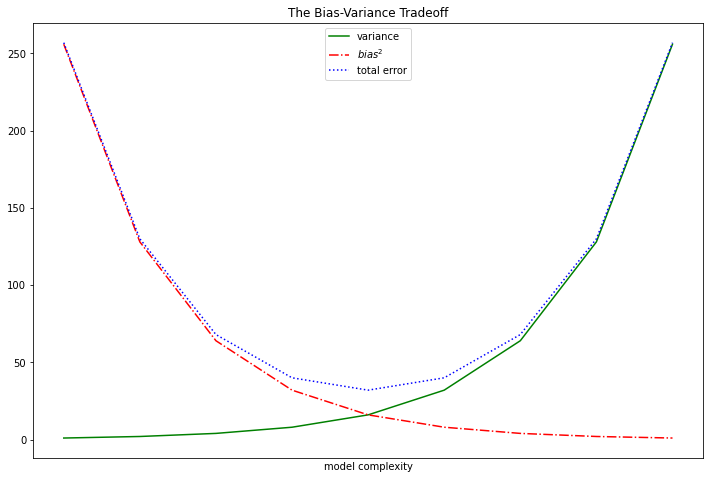

In [66]:

plt.figure(figsize=(12,8))
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='$bias^2$')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()


#plt.savefig('im/viz_line_chart.png')
#plt.gca().clear()



## Scatter 
Equivalent to putpixel set each data points. ``annotate()`` set the label and description in the graph.

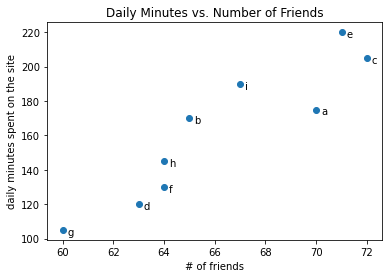

In [75]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


#plt.savefig('im/viz_scatterplot.png')
#plt.gca().clear()


Some situation, default axis may not reflect the maning such when the x-y is not the same range.

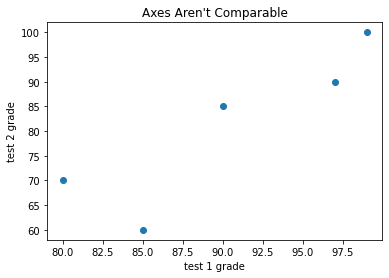

In [76]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

#plt.savefig('im/viz_scatterplot_axes_not_comparable.png')
#plt.gca().clear()


Enforce the x-y axis to be equals by ``plt.axis("equal")``

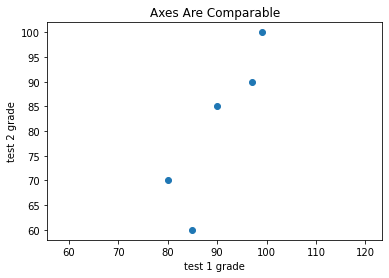

In [77]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()
# plt.savefig('im/viz_scatterplot_axes_comparable.png')
# plt.gca().clear()